In [1]:
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import os
import gensim

In [2]:
def plot_top10_gensim_words(filepath,word):

    def xplotter(results):
        words = []
        embeds = []

        for res in results:
            embeds.append(res[1])
            words.append(res[0])
        
        tsne_model = TSNE(init='pca')
        res_embeds = tsne_model.fit_transform(embeds)

        x_axis_val = []
        y_axis_val = []
        for val in res_embeds:
            x_axis_val.append(val[0])
            y_axis_val.append(val[1])
            
        plt.figure(figsize=(10, 10))
        
        for i in tqdm(range(len(x_axis_val))):
            plt.scatter(x_axis_val[i],y_axis_val[i])
            plt.annotate(words[i],
                        xy=(x_axis_val[i],y_axis_val[i]),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom')
        plt.show()
        #plt.savefig(""+word+".png")
    
    cbow_own = gensim.models.KeyedVectors.load_word2vec_format(filepath, binary=False)
    similar_words = cbow_own.most_similar(positive=[word], topn = 10)
    res = {}
    for i, embed in tqdm(enumerate(similar_words)):
        res[embed[0]] = [embed[1], cbow_own[embed[0]]]


    results = []
    for t in sorted(res.items(), key=lambda item: item[1][0], reverse=True)[0:10]:
        results.append([t[0], t[1][1]])

    print('Word:-', word)
    print('Words:-', end='\t')
    for res in results:
        print(res[0], end=', ')
    print()
    xplotter(results)

In [48]:

def load_embedding_file(filepath):
    word2idx = {}
    embeddings = []
    with open(filepath, 'r') as f:
        line = f.readline()
        vocab_size, embedding_size = map(int, line.strip().split())
        print('Loading embeddings : {}'.format(filepath))
        for i in tqdm(range(vocab_size)):
            line = f.readline()
            line = line.strip().split()
            word = line[0]
            embedding = np.array(line[1:], dtype=np.float32)
            word2idx[word] = len(word2idx)
            embeddings.append(embedding)
    idx2word = {v: k for k, v in word2idx.items()}
    return word2idx,idx2word, np.array(embeddings)


def tsne_plot(results,save_path):
        words = []
        embeds = []

        for res in results:
            embeds.append(res[1])
            words.append(res[0])
        
        tsne_model = TSNE(init='pca')
        res_embeds = tsne_model.fit_transform(embeds)

        x_axis_val = []
        y_axis_val = []
        for val in res_embeds:
            x_axis_val.append(val[0])
            y_axis_val.append(val[1]) 
        plt.figure(figsize=(10, 10)) 
        for i in range(len(x_axis_val)):
            plt.scatter(x_axis_val[i],y_axis_val[i])
            plt.annotate(words[i],
                        xy=(x_axis_val[i],y_axis_val[i]),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom')            
        # plt.savefig(save_path)
        plt.show()

def plot_top10_words(embedding_file_path,word, save_path):
    word = word.lower()
    save_path = os.path.join(save_path, word+'.png')
    vocab,ind2vocab,embeddings=load_embedding_file(embedding_file_path)
    if word not in vocab:
        print('Word not in vocabulary')
        exit(1)
    word_index = vocab[word]
    word_embed = embeddings[word_index]
    res = {}
    print('Calculating cosine similarity :')
    for i in tqdm(range(len(embeddings))):
        if i!=word_index:
            res[i] = [1 - cosine(embeddings[i], word_embed), embeddings[i]]
    results = []
    for t in sorted(res.items(), key=lambda item: item[1][0], reverse=True)[0:10]:
        results.append([ind2vocab[t[0]], t[1][1]])
    print('Word:-', word)
    print('Words:-', end='\t')
    for res in results:
        print(res[0], end=', ')
    print()
    tsne_plot(results,save_path)



In [4]:
cbow_neg_path_400 ='../embeddings/cbow_neg/embeddings_400.txt'
cbow_neg_path_400_2 ='../embeddings/cbow_neg/embeddings_400_2.txt'
cbow_neg_path_300 ='../embeddings/cbow_neg/embeddings_300.txt'
svd_path_300 = '../embeddings/svd/svd_embeddings_300.txt'
svd_path_400 = '../embeddings/svd/svd_embeddings_400.txt'
glove_path = '../embeddings/glove/glove.6B.100d.txt'

10it [00:00, 56148.65it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- titanic
Words:-	sinking, dicaprio, rms, voyage, sunk, epic, starship, winslet, r.m.s., iceberg, 


100%|██████████| 10/10 [00:00<00:00, 257.38it/s]


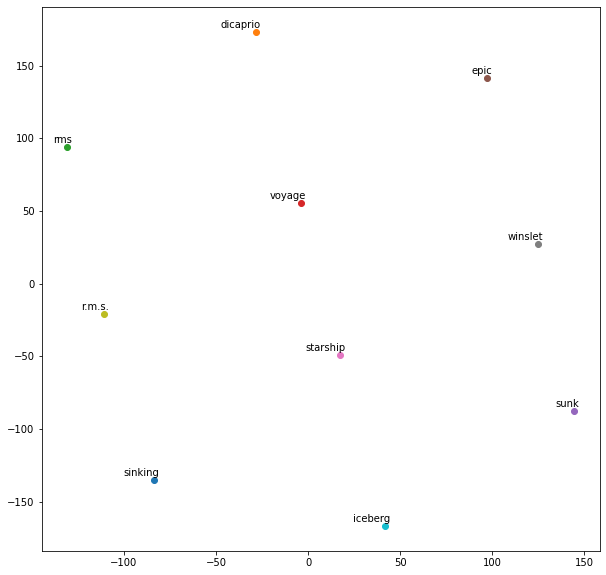

In [5]:
plot_top10_gensim_words(glove_path,'titanic')

10it [00:00, 77816.40it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- laugh
Words:-	laughs, joke, chuckle, cry, laughing, funny, smile, jokes, laughter, giggle, 


100%|██████████| 10/10 [00:00<00:00, 279.03it/s]


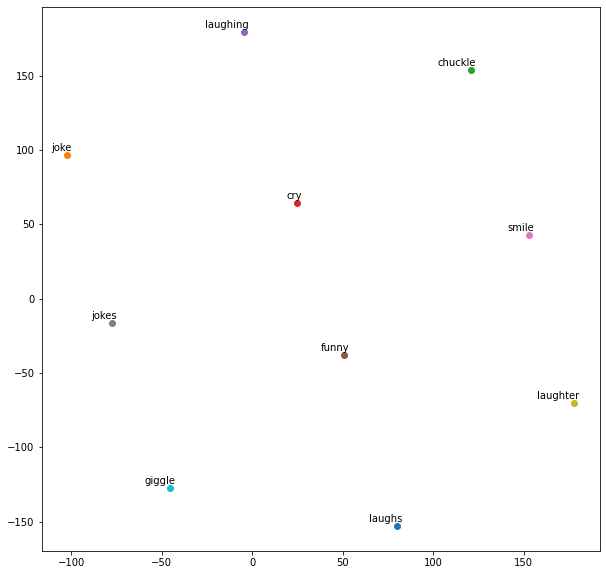

In [101]:
plot_top10_gensim_words(glove_path,'laugh')


/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 27271.16it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- titanic
Words:-	description, holocaust, structure, regime, last, pimpernel, saga, mafia, passion, third, 


100%|██████████| 10/10 [00:00<00:00, 344.31it/s]


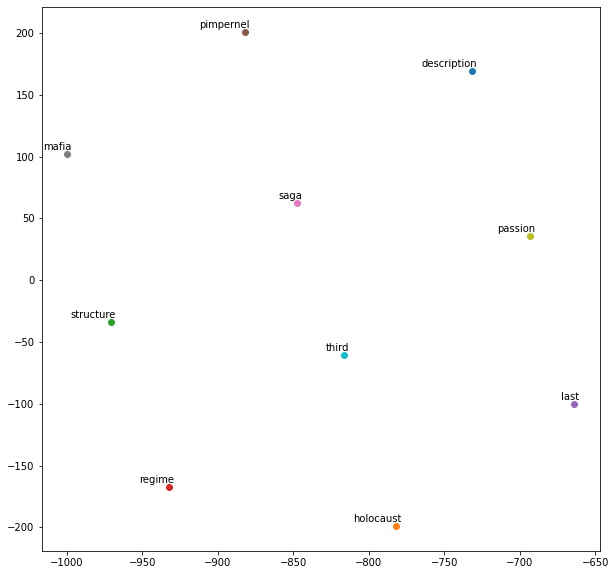

In [102]:
plot_top10_gensim_words(svd_path_400,'titanic')

10it [00:00, 75709.46it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- titanic
Words:-	ending, extras, description, formula, makers, disk, itself, mood, extra, liners, 


100%|██████████| 10/10 [00:00<00:00, 412.35it/s]


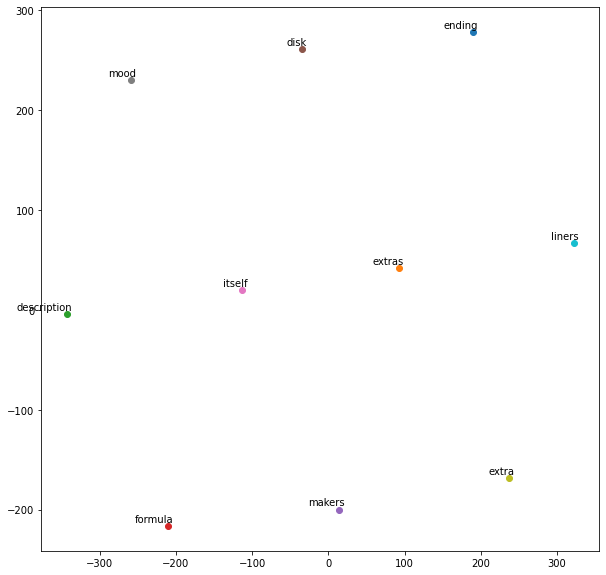

In [107]:
plot_top10_gensim_words(cbow_neg_path_300,'titanic')

/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 74898.29it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- watch
Words:-	rewatch, see, revisit, buy, find, give, compare, get, make, skip, 


100%|██████████| 10/10 [00:00<00:00, 314.88it/s]


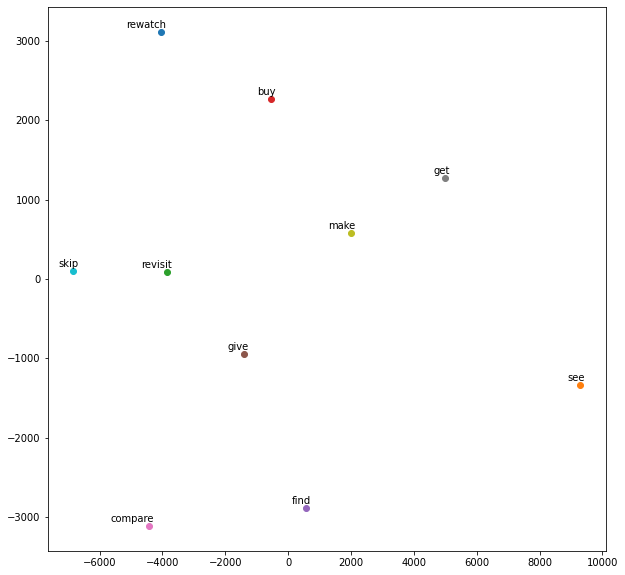

In [67]:
plot_top10_gensim_words(svd_path_400,'watch')

10it [00:00, 82080.31it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- watch
Words:-	feel, give, consider, see, call, enjoy, realize, got, hate, find, 


100%|██████████| 10/10 [00:00<00:00, 411.42it/s]


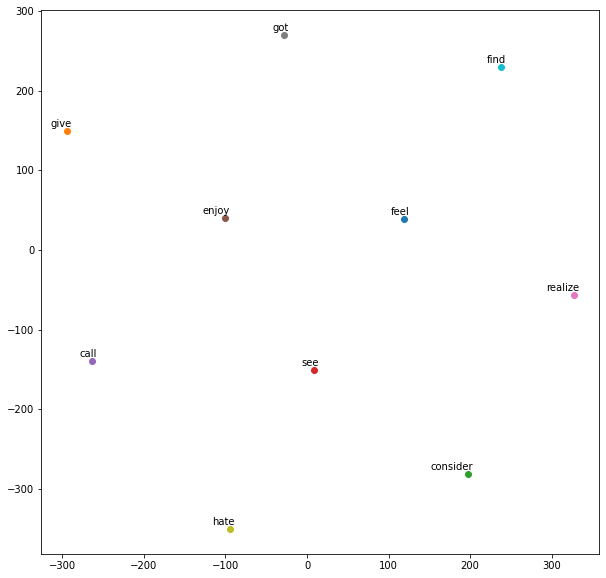

In [87]:
plot_top10_gensim_words(cbow_neg_path_400_2,'watch')

10it [00:00, 84562.58it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- watch
Words:-	see, appreciate, give, suffice, prefer, feel, hate, wait, borrow, encourage, 


100%|██████████| 10/10 [00:00<00:00, 311.01it/s]


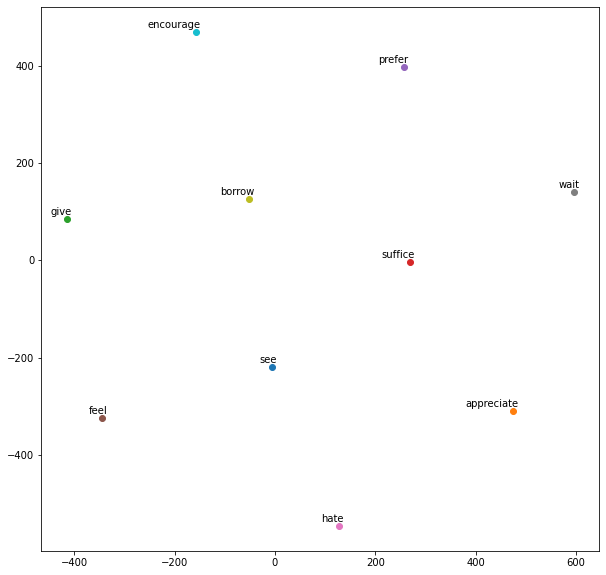

In [70]:
plot_top10_gensim_words(cbow_neg_path_400,'watch')

/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 71697.50it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- laugh
Words:-	cry, cringe, giggle, smile, shiver, feel, breathless, weep, grab, laughing, 


100%|██████████| 10/10 [00:00<00:00, 279.91it/s]


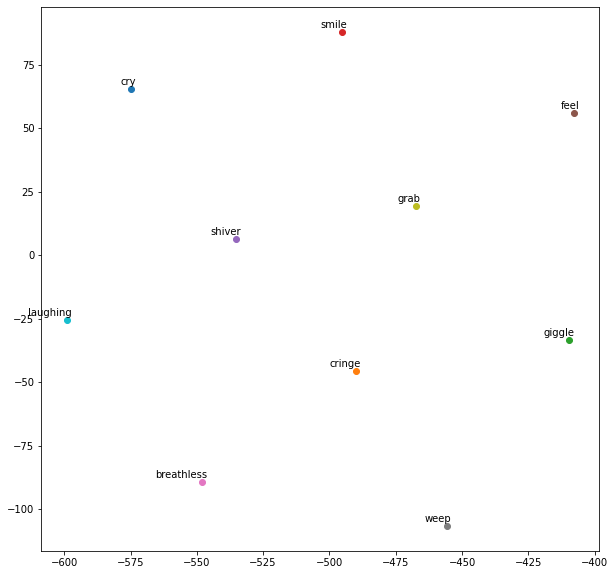

In [98]:
plot_top10_gensim_words(svd_path_400,'laugh')

10it [00:00, 109511.85it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- laugh
Words:-	assume, hoping, liking, hope, upset, laughed, agree, pleased, forgot, thrilled, 


100%|██████████| 10/10 [00:00<00:00, 313.72it/s]


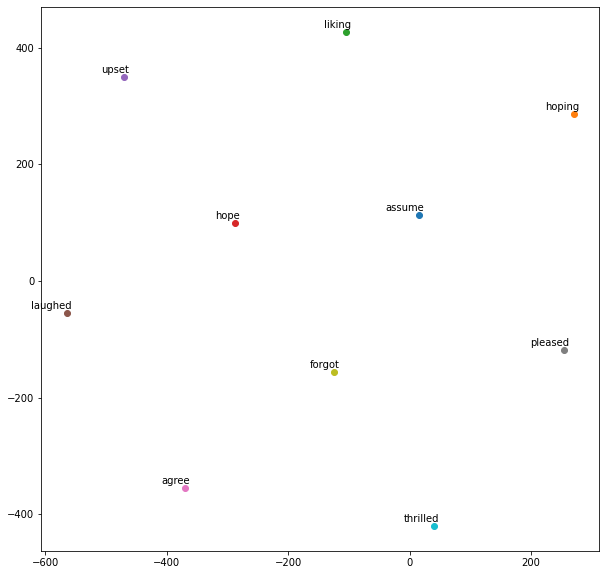

In [97]:
plot_top10_gensim_words(cbow_neg_path_300,'laugh')

Loading embeddings : ../embeddings/svd/svd_embeddings_400.txt


100%|██████████| 36225/36225 [00:04<00:00, 7602.52it/s]


Calculating cosine similarity :


  0%|          | 0/36225 [00:00<?, ?it/s]/home/soumodiptab/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 36225/36225 [00:01<00:00, 29089.34it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- boat
Words:-	<unk>, car, plane, bomb, river, rat, campaign, snake, bus, witch, 


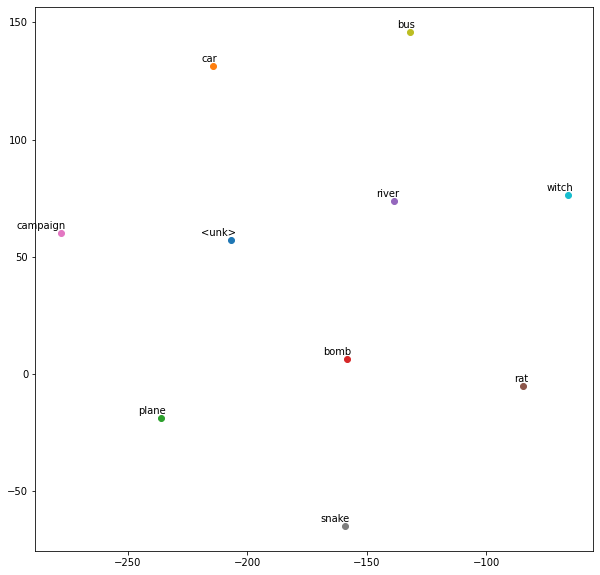

In [46]:
plot_top10_words(svd_path,'boat','dummy')

0it [00:00, ?it/s]/home/soumodiptab/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
33069it [00:01, 26197.12it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- redemption
Words:-	<unk>, plot, dialogue, music, dialog, pacing, soundtrack, ending, beast, casting, 


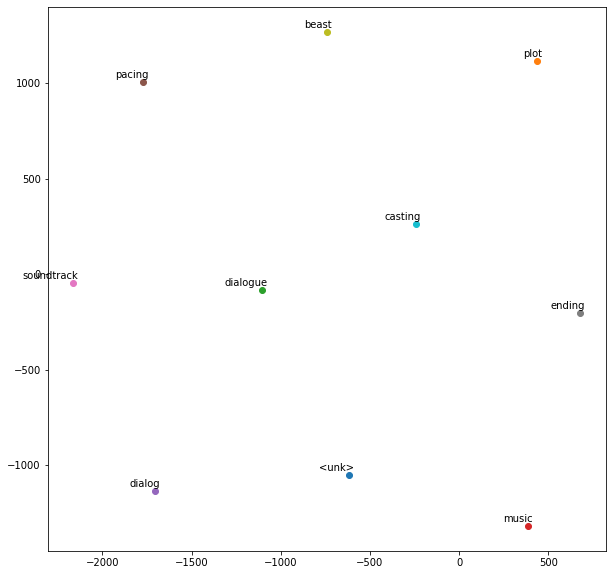

In [43]:
plot_top10_words('redemption','../embeddings/svd/svd_embeddings_300.txt')

33069it [00:00, 33442.98it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- bad
Words:-	damn, quite, sadly, today, unfortunately, here, sometimes, horrible, perhaps, worth, 


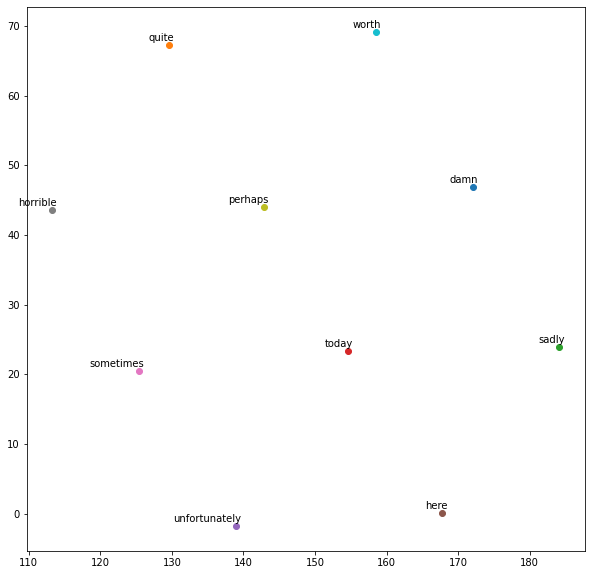

In [40]:
plot_top10_words('bad','../embeddings/cbow/cbow_embeddings_300.txt')

0it [00:00, ?it/s]/home/soumodiptab/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
33069it [00:01, 25800.43it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- bad
Words:-	<unk>, horrible, terrible, cliche, obviously, weird, crazy, lame, merely, fake, 


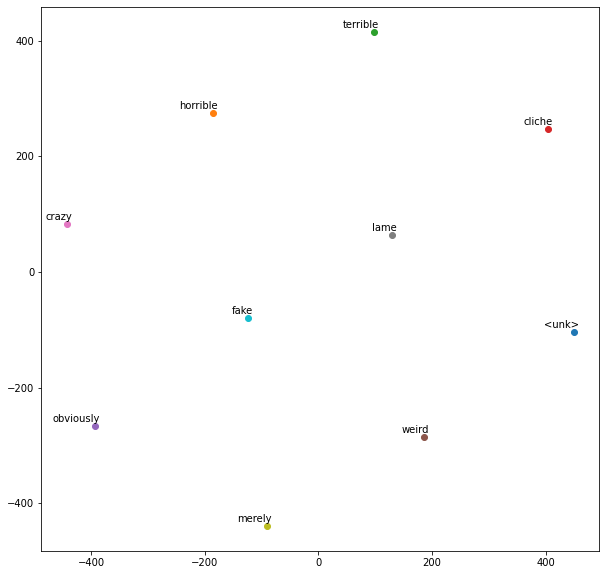

In [38]:
plot_top10_words('bad','../embeddings/svd/svd_embeddings_300.txt')

33069it [00:00, 33194.88it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- good
Words:-	very, pretty, awesome, funny, nevertheless, flick, enjoyable, overall, well, worth, 


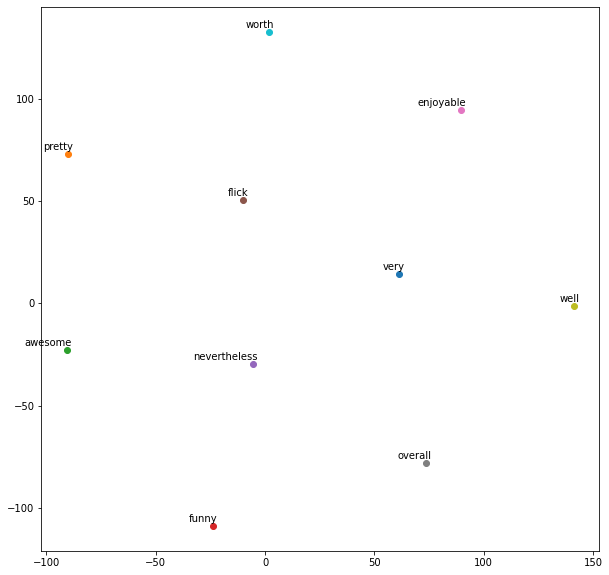

In [45]:
plot_top10_words('good','../embeddings/cbow/cbow_embeddings_300.txt')

0it [00:00, ?it/s]/home/soumodiptab/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
33069it [00:01, 31771.48it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- good
Words:-	<unk>, great, wonderful, pleasant, fine, decent, solid, simple, terrific, strange, 


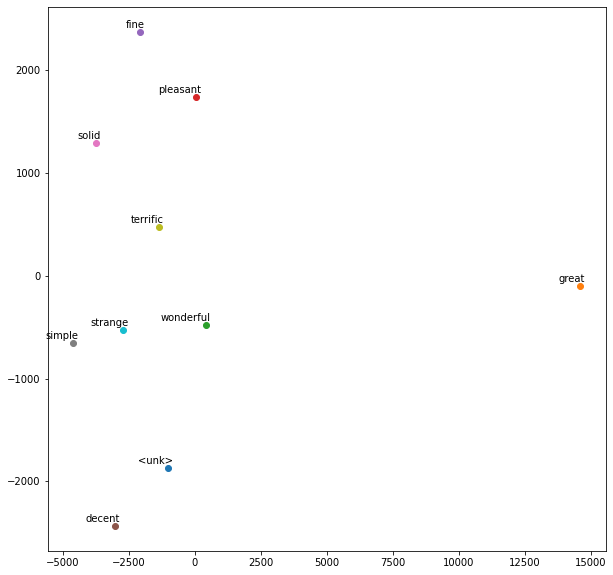

In [39]:
plot_top10_words('good','../embeddings/svd/svd_embeddings_300.txt')

33069it [00:01, 26589.12it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- titanic
Words:-	ending, extras, description, formula, makers, disk, itself, mood, extra, liners, 


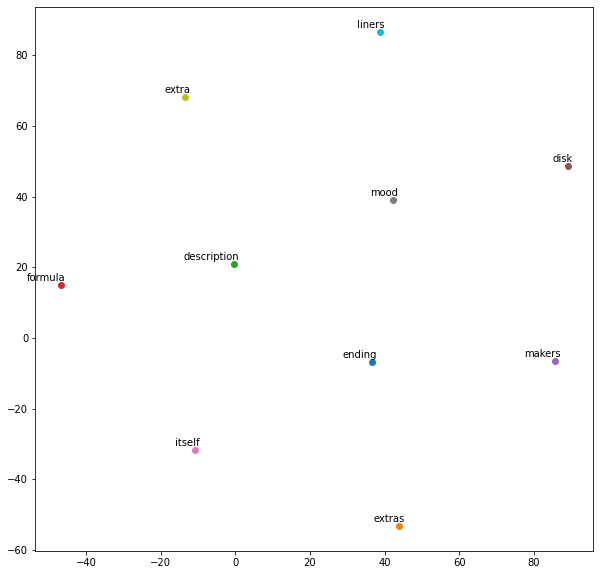

In [46]:
plot_top10_words('titanic','../embeddings/cbow/cbow_embeddings_300.txt')

0it [00:00, ?it/s]/home/soumodiptab/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
33069it [00:01, 26460.45it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- titanic
Words:-	<unk>, structure, regime, description, last, fourth, pimpernel, saga, third, passion, 


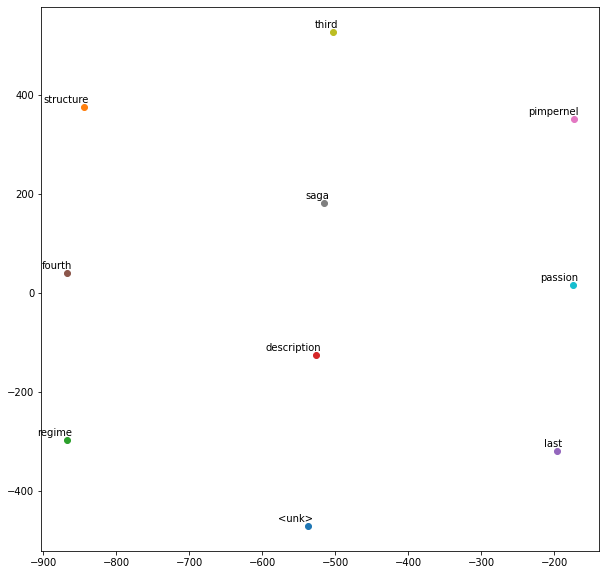

In [47]:
plot_top10_words('titanic','../embeddings/svd/svd_embeddings_300.txt')

In [104]:
words = ['actor','acting','cinematography','camera','cinema']

10it [00:00, 85773.09it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- actor
Words:-	solid, engaging, charming, ensemble, marvelous, suspenseful, strong, musical, terrific, powerful, 


100%|██████████| 10/10 [00:00<00:00, 424.68it/s]


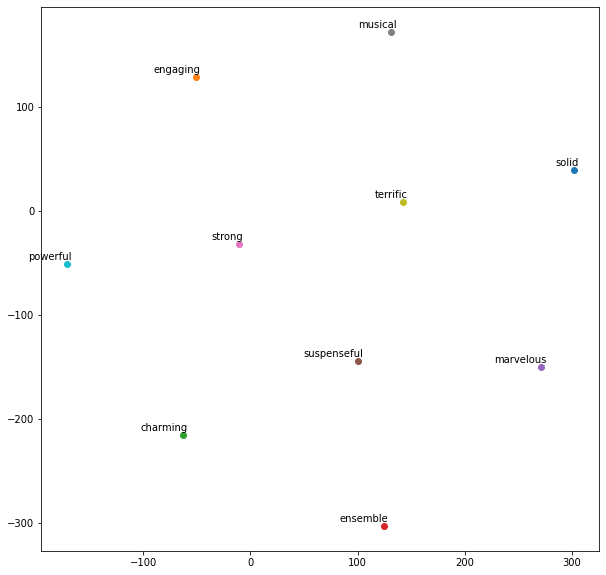

10it [00:00, 72067.08it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- acting
Words:-	scenery, action, solid, flawless, ensemble, witty, beautiful, memorable, music, actor, 


100%|██████████| 10/10 [00:00<00:00, 372.26it/s]


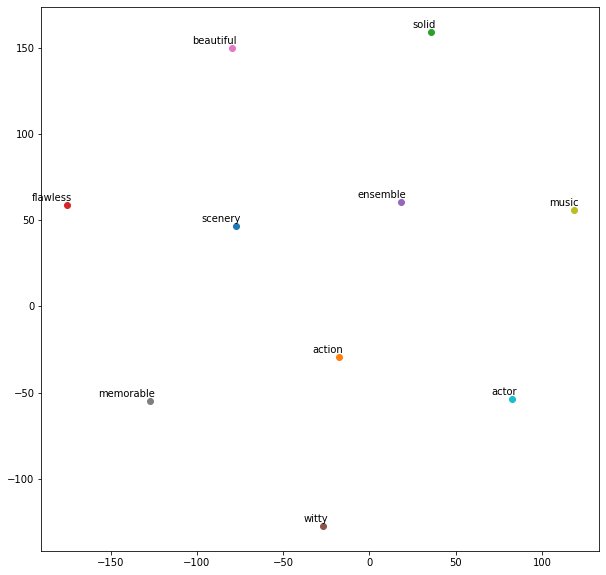

10it [00:00, 90006.52it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- cinematography
Words:-	casting, cast, camera, style, photography, atmosphere, lighting, commentary, dialogue, main, 


100%|██████████| 10/10 [00:00<00:00, 391.67it/s]


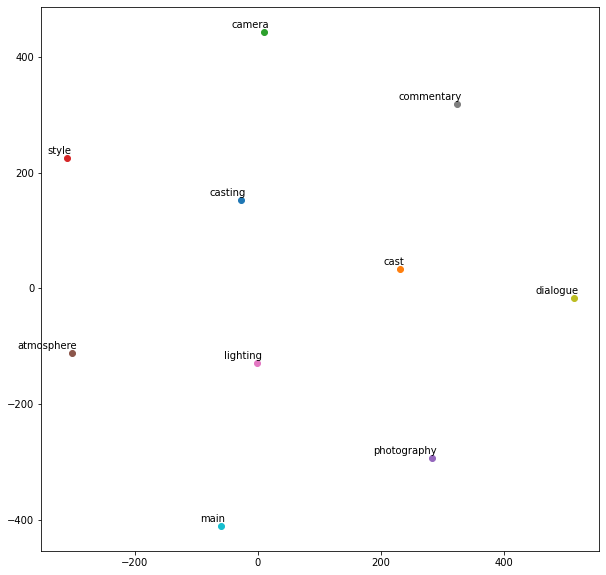

10it [00:00, 84733.41it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- camera
Words:-	main, atmosphere, dialogue, sequence, angles, casting, commentary, interaction, sets, trailer, 


100%|██████████| 10/10 [00:00<00:00, 302.69it/s]


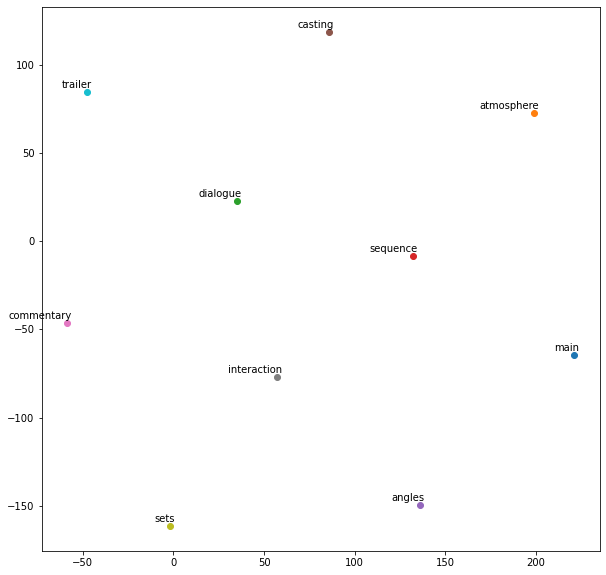

10it [00:00, 99864.38it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- cinema
Words:-	tragic, brief, aspects, result, amount, sheer, image, historic, representation, glorious, 


100%|██████████| 10/10 [00:00<00:00, 390.64it/s]


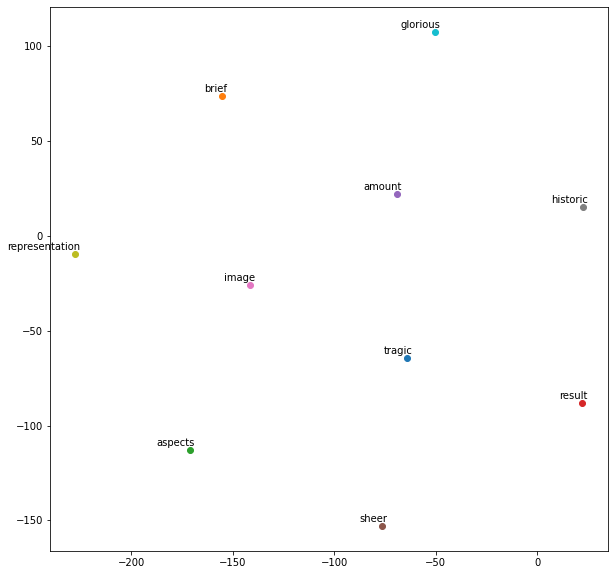

In [105]:
for word in words:
    plot_top10_gensim_words(cbow_neg_path_300,word)

/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 67001.66it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- actor
Words:-	actress, artist, assassin, agent, filmmaker, marine, swordsman, pilot, singer, pianist, 


100%|██████████| 10/10 [00:00<00:00, 373.59it/s]


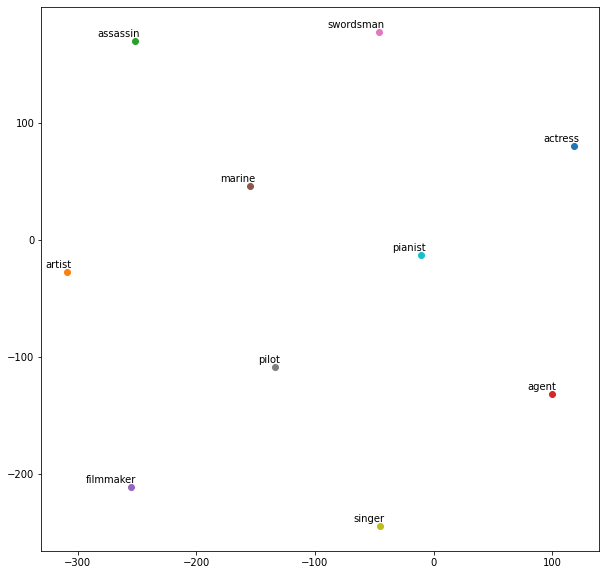

/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 71943.46it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- acting
Words:-	music, cinematography, dialogue, casting, dialog, scenery, pacing, storyline, choreography, animation, 


100%|██████████| 10/10 [00:00<00:00, 297.88it/s]


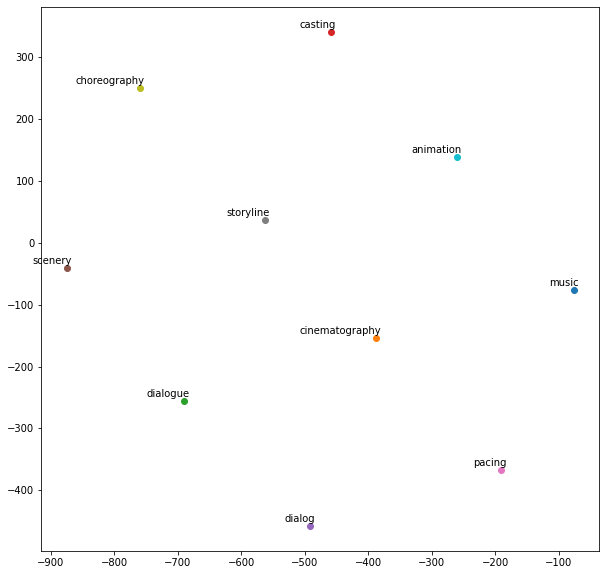

/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 78545.02it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- cinematography
Words:-	scenery, photography, choreography, pacing, camerawork, music, editing, dialogue, lighting, acting, 


100%|██████████| 10/10 [00:00<00:00, 375.56it/s]


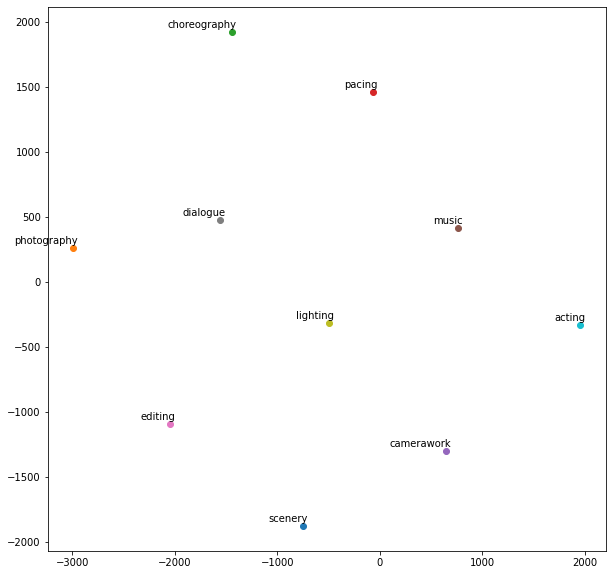

/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 99391.09it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- camera
Words:-	beast, crow, music, police, landscape, guards, feds, pacing, royal, press, 


100%|██████████| 10/10 [00:00<00:00, 414.18it/s]


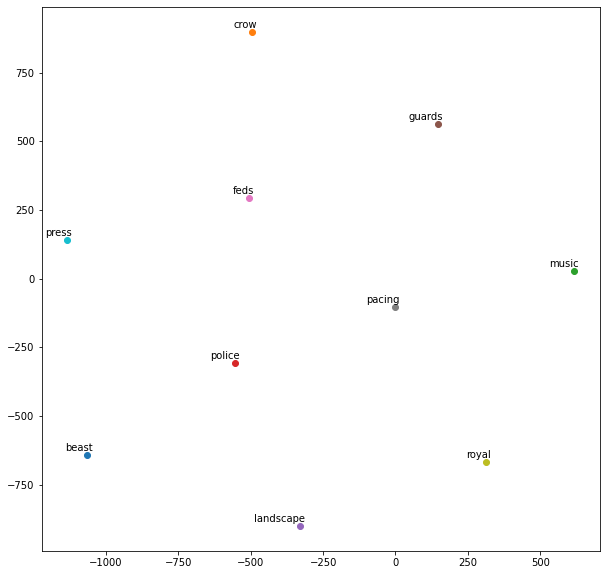

/home/soumodiptab/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
10it [00:00, 28378.24it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- cinema
Words:-	history, wwii, psychology, filmmaking, medieval, danger, analysis, israel, charge, hollywood, 


100%|██████████| 10/10 [00:00<00:00, 348.23it/s]


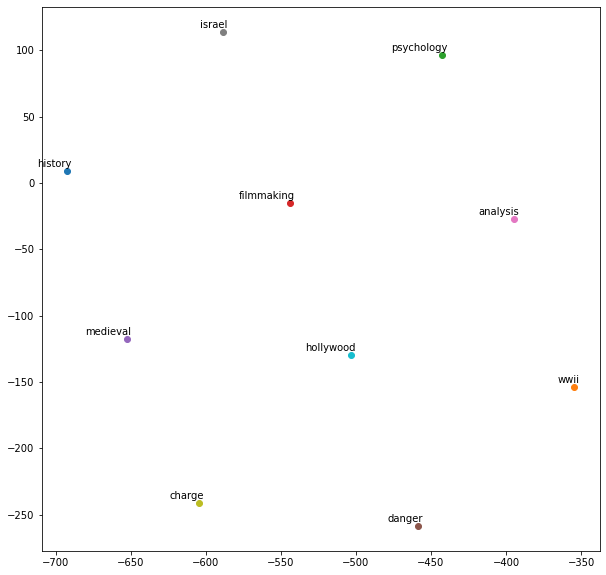

In [106]:
for word in words:
   plot_top10_gensim_words(svd_path_400,word)